<a href="https://colab.research.google.com/github/PrathamPathak0502/Major-Project/blob/main/Model5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

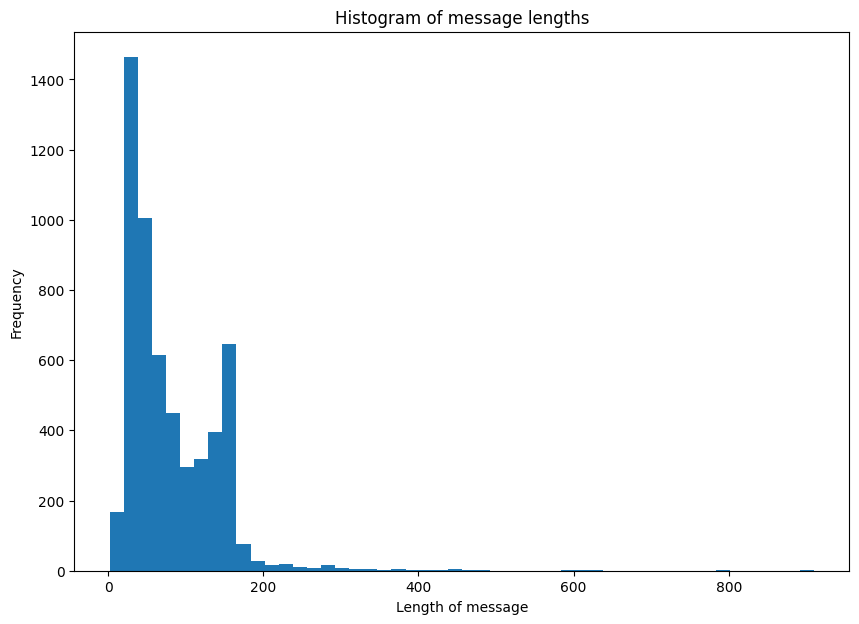

<Figure size 1500x800 with 0 Axes>

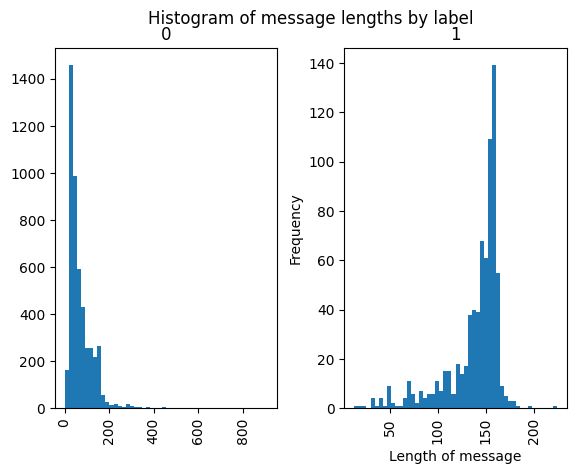

x_train shape: (4457, 8672)
x_test shape: (1115, 8672)
MLP Classifier
Accuracy score: 0.9928251121076234
Precision score: 1.0
Recall score: 0.9424460431654677
F1 score: 0.9703703703703704
Prediction for input text: spam


In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the data
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms = sms.rename(columns={"v1": "label", "v2": "text"})
sms['length'] = sms['text'].apply(len)
sms['label'] = sms['label'].map({'ham': 0, 'spam': 1})

# Plot data
plt.figure(figsize=(10,7))
sms['length'].plot(bins=50, kind='hist')
plt.title('Histogram of message lengths')
plt.xlabel('Length of message')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(15,8))
sms.hist(column='length', by='label', bins=50)
plt.suptitle('Histogram of message lengths by label')
plt.xlabel('Length of message')
plt.ylabel('Frequency')
plt.show()

# Text processing
count = CountVectorizer()
text = count.fit_transform(sms['text'])

# Split the data
x_train, x_test, y_train, y_test = train_test_split(text, sms['label'], test_size=0.20, random_state=1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Train the model
model = MLPClassifier()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

# Print metrics
print("MLP Classifier")
print("Accuracy score: {}".format(accuracy_score(y_test, prediction)))
print("Precision score: {}".format(precision_score(y_test, prediction)))
print("Recall score: {}".format(recall_score(y_test, prediction)))
print("F1 score: {}".format(f1_score(y_test, prediction)))

# Prepare input for prediction
input_text = ["To get 2.50 pounds free call credit and details of great offers pls reply 2 this text"]
input_vector = count.transform(input_text)
input_prediction = model.predict(input_vector)
print("Prediction for input text:", "spam" if input_prediction[0] == 1 else "ham")
